# Chapter 5 - Mod el Evaluation and Improvement
모델평가와 성능향상
1. <strong>모델평가</strong>
2. <strong>매개변수의 선택</strong>

비지도 학습의 경우, 데이터의 형태와 알고리즘에 따라 정교한 조절이 필요하다

때문에 이번장에서는 '지도학습'을 중심으로 '회귀'와 '분류'모델에 집중하여 설명을 할 것이다
1. 데이터 전처리
2. <strong>.train_test_split</strong> 으로 훈련 데이터를 구분 (일반화 데이터 적응능력을 확인)
3. <strong>.fit</strong> 모델을 훈련한다
4. <strong>score</strong> 메서드로 모델을 평가한다 (정확히 분류된 샘플의 비율을 계산한다)

In [40]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0) # 인위적 데이터 셋
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train) # 로지스틱 모델을 생성
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


<br></br>
## 1 교차검증 cross-validation
Train/ Test를 한 세트로 한 번에 나누는 것 보다 안정적인 통계적 평가방식

데이터를 여러번 반복해서 나누어, 여러개의 모델을 학습한다

<strong>K-fold cross validation (K = 5 ~ 10)</strong>

1. 총 5개의 세트로 나눈뒤
2. [1,2,3,4], [1,3,4,5], [1,2,4,5], [1,2,3,5], [2,3,4,5] 순차로 훈련하고
3. 나머지 5,2,3,4,1을 순차적으로 Test로 측정하여 5개의 정확도 값을 추출한다

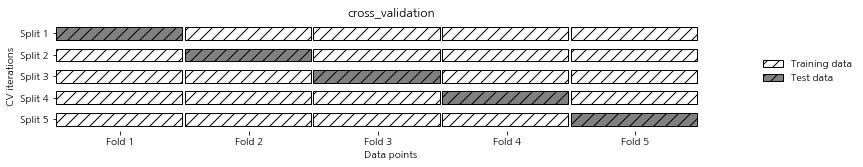

In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family='NanumGothic')

import numpy as np
import pandas as pd
from data import mglearn

mglearn.plots.plot_cross_validation()

### 01 scikit-learn 에서의 교차검증
cross_val_score : 교차검증 모듈

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차검증 점수 (Cross-validation scores) : {}".format(scores))
# cross Val의 Default 값은 3으로, 3개의 정확도 측정결과값을 출력한다

교차검증 점수 (Cross-validation scores) : [ 0.96078431  0.92156863  0.95833333]


In [43]:
# cross Val을 5로 설정한 경우
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("교차검증 점수 (Cross-validation scores) : \n{}".format(scores))
print("\n교차검증 평균점수 (Average cross-validation score) : {:.2f}".format(scores.mean()))

교차검증 점수 (Cross-validation scores) : 
[ 1.          0.96666667  0.93333333  0.9         1.        ]

교차검증 평균점수 (Average cross-validation score) : 0.96


### 02 교차검증의 장단점
<strong>train_test</strong> 는 무작위로 나눠서 전체적인 판단만 가능할 뿐, 샘플에 대한 세밀한 판단이 불가능하다

반면 <strong>교차검증</strong>은 
1. <strong>샘플이 정확히 구분되어 순차적 대입</strong>되어서, 어느부분에 문제가 있는지 판단이 가능
2. 이후에 모델의 일반화 작업을 진행함에 유용하다
3. 단점으로는 연산비용이 늘어난다
4. 교차검증은 <strong>데이터의 일반화 측정</strong>을 위한 내부적 여러 알고리즘을 확인할 뿐, <strong>별도 학습모델을 생성하진 않는다</strong>

### 03 계층별 K-겹 교차검증과 그 이외의 전략들
<strong>폴드 내부의 class의 비율</strong>이, <strong>전체 Table 의 class 비율</strong>과 일치하도록 데이터를 나눈다

K개의 폴드로 나누는 것이 항상 좋은 결과를 도출하지는 않기 때문이다

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

# Target 값이 순차적으로 정렬된 테이블인 경우에는 (target값 편중시) 
# k-fold 교차 검증도가 0이 되기 쉽다


Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


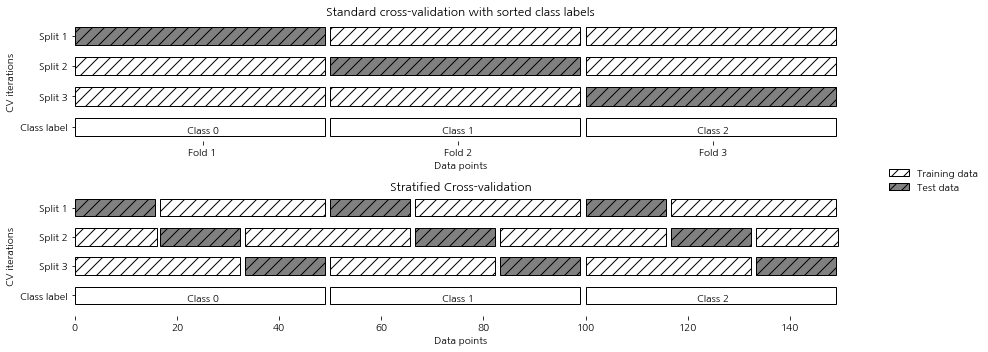

In [45]:
# '계층별 k-겹 교차검증(startified k-fold cross-validation)'을 사용하면 위의 문제가 해결 가능하다
mglearn.plots.plot_stratified_cross_validation()

### 04 교차검증의 상세옵션
<strong>cv (cross-val)</strong> 매개변수에 <strong>'교차검증 분할기'(cross-validation splitter)</strong>를 전달함으로써 세밀한 제어가 가능하다
1. <strong>k cross fold</strong> : 회귀 모델에 적합한 데이터를 검증시 사용
2. <strong>계층별 K cross fold</strong> : 분류 모델에 적합한 데이터를 검증시 사용
3. 기타 다른사람이 구현한 결과를 재현시 : 기본 k cross fold 검증을 사용한다

In [46]:
# 다른 사람이 구현한 결과를 재현하는 경우
# 임의의 K-fold 갯수를 입력하고
# 임의의 k-fold 를 cross-val 의 cv 옵션에 전달한다
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [47]:
# 단순 교차검증을 수행하는 경우
kfold = KFold(n_splits=3)

print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [48]:
# Kfold 모듈을 사용하면, cross-val 갯수만이 아닌 다양한 옵션값을 지정 가능하다
# shuffle=True : 데이터를 뒤 섞은뒤 모델에 적용한다
# random_state=0 : 시작값을 지정해야 일정한 결과를 출력한다
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


In [49]:
# Target 1개로 Test_set을 구성한다
# 샘플이 큰 경우에는 매우 오래 걸리지만
# 작은 데이터셋의 경우는 유용한 결과를 출력한다 

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("교차검증 분할 횟수 (Number of cv iterations): ", len(scores))
print("정확도 평균 (Mean accuracy): {:.2f}".format(scores.mean()))

교차검증 분할 횟수 (Number of cv iterations):  150
정확도 평균 (Mean accuracy): 0.95


### 05 임의분할 교차검증
shuffle-split cross validation 
1. train_size 만큼의 포인트로 Train_set을 만들고
2. Test_size 만큼의 포인트로 Test_set을 만들도록 분할한다
3. \1. \2. 작업을 n_splits 횟수만큼 반복한다

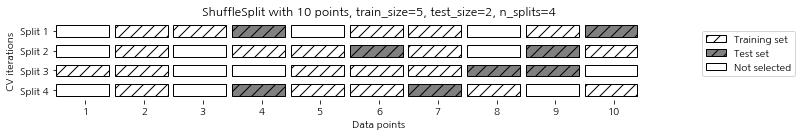

In [50]:
# 전체 샘플이 10개인 Data_set의 경우
# 5개의 포인트 Train세트, 2개의 포인트 Test세트로 4번 반복하여 자료를 분할한다
# 포인트 셋에 integer를 입력시 : 데이터 갯수
# 포인트 셋에 float를 입력시 : 데이터 비율

mglearn.plots.plot_shuffle_split()

In [51]:
# 포인트 셋에 float를 입력시 : 데이터 비율 적용 예
# 데이터 셋 50%를 train_set / 50%를 test_set으로 10번 반복 분할한다

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

# 데이터를 부분 샘플링 방식은 
# 개별 적용(.LeaveOneOut)이 어려운 대규모 데이터 셋의 작업에 유용하다

Cross-validation scores:
[ 0.89333333  0.93333333  0.90666667  0.85333333  0.96        0.94666667
  0.74666667  0.93333333  0.88        0.97333333]


### 06 그룹별 교차검증
<strong>사진인식 모델</strong>의 경우 인식률을 높이기 위해선, <strong>Train에서 사용한 동일한 사진</strong>을 <strong>Test에도 일정부분 포함</strong>시켜야 한다

이와같이 Train/ Test 분할시, 분리되지 않아야 할 그룹을 지정하는 작업을 의미한다

일반적인 예로는 <strong>의료관련 어플리케이션, 음성인식 모듈</strong>등을 들 수 있다

In [52]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)

# groups 의 같은 값을 갖는 index 값들은, 같은 그룹에 속한다
# 0 : 3개 객체 | 1 : 4개 객체 | 2 : 2개 객체 | 3 : 3개 객체
# 총 4개 그룹 데이터를 3개로 분할하여 그룹을 지정한다
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] 
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


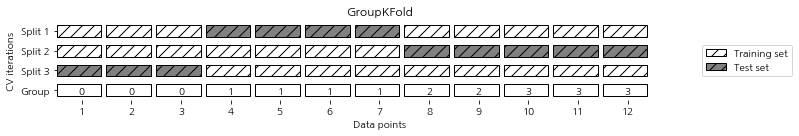

In [53]:
mglearn.plots.plot_group_kfold()

<br></br>
## 2 그리드 서치
앞에서 일반화 성능의 측정, 매개변수 튜닝 작업을 하였다면

적절한 <strong>매개변수를 찾는 과정</strong>으로써 <strong>Grid-search 작업</strong>(가능한 모든 조합을 시도)을 들 수 있다

SVM 모듈에서 <strong>gamma</strong>와 <strong>C</strong>에 0.001, 0.001, 0.01, 1, 10, 100 의 조합을 적용한다
 (6개 X 6개 = 총 36가지 조합을 시도)
<br></br>
### 01 간단한 그리드 서치
naive grid search implementation- for 반복문 활용

In [54]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(\
                 iris.data, iris.target, random_state=0)
print("훈련 세트의 크기 (Size of training set): {}"
      "\n테스트 세트의 크기 (size of test set): {}".format(
      X_train.shape[0], X_test.shape[0]))

훈련 세트의 크기 (Size of training set): 112
테스트 세트의 크기 (size of test set): 38


In [55]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C) # 매개변수 각 조합에 대해 SVC를 훈련
        svm.fit(X_train, y_train)   # Test_set으로 SVC를 훈련한다
        score = svm.score(X_test, y_test) 
        if score > best_score:      # 점수가 더 높으면 매개변수와 함께 기록한다
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고의 점수 (Best score): {:.2f}".format(best_score))
print("\n최적의 매개변수 (Best parameters): \n{}".format(best_parameters))

# 결과해석
# 최적의 매개변수 조합을 출력하였지만
# 이는 제공한 Data-set에 한정된 결과일 뿐이여서 일반화 검증을 필요로 한다
# 따라서 위의 조합 결과를 검증할, 독립된 테스트셋 데이터를 필요로 한다

최고의 점수 (Best score): 0.97

최적의 매개변수 (Best parameters): 
{'C': 100, 'gamma': 0.001}


### 02 매개변수 과대적합과 검증세트
grid-search를 검증할 독립된 데이터 셋을 생성한다

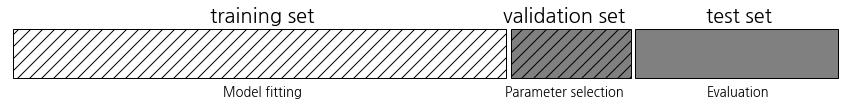

In [56]:
# 최초 Data-set을 3개로 나누어 문제를 해결한다
# training set : 모델을 생성한다
# validation set : 매개변수를 선택한다
# test set : 선택한 매개변수 성능을 평가한다
mglearn.plots.plot_threefold_split()

In [57]:
from sklearn.svm import SVC
# train + validation, test 로 분할한다 
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# train + validation 를 train , validation 개별로 분할한다
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84   size of validation set: 28   size of test set: 38



In [58]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C) # 매개변수 조합으로 SVC 훈련
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid) # 검증결과
        if score > best_score: # 검증결과값이 높으면 {dict}에 기록한다
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최적의 매개변수 조합 점수 (Best score on validation set): \n{:.2f}".format(best_score))
print("최적의 매개변수 조합 (Best parameters): ", best_parameters)

최적의 매개변수 조합 점수 (Best score on validation set): 
0.96
최적의 매개변수 조합 (Best parameters):  {'C': 10, 'gamma': 0.001}


In [59]:
# Train + valid 데이터를 합친 데이터로 훈련을 한 뒤, Test 데이터로 평가를 한다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("최적의 매개변수 Test 점수 (Test set score with best parameters): \n{:.2f}".format(test_score))

최적의 매개변수 Test 점수 (Test set score with best parameters): 
0.92


In [60]:
# 결과해석
# 매개변수 valid 검증 결과는 0.97보다 약간 낮아졌다, 이는 사용한 데이터 갯수가 작기 떄문으로 생각된다
# Test 검증 결과는 더 낮은 0.92를 출력한다 

### 03 Grid search에 교차검증을 사용
데이터를 Train, Valid, Test로 나누는 방법은 널리 사용되지만, 어떻게 나눌지에 대해선 민감한 문제이다
1. 간단한 그리드 서치 : {C : 100 , gamma : 0.001}
2. Valid 그리드 서치 : {C : 10 , gamma : 0.001}

서로 다른 결과를 도출하였다. 

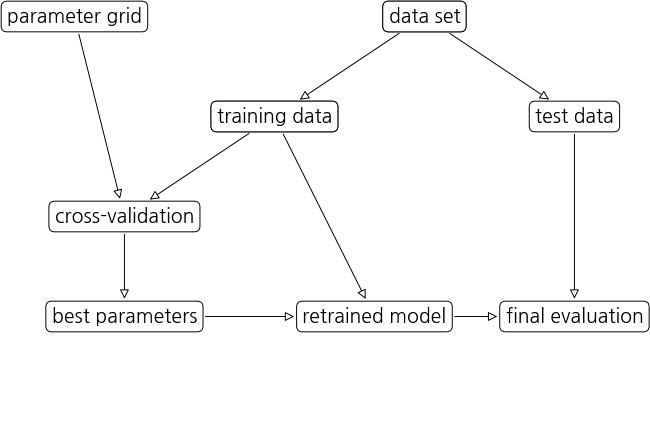

In [61]:
# Data_set을 나누고, grid search를 적용하여 최종 매개변수를 평가하는 전체 과정을 시각화
mglearn.plots.plot_grid_search_overview()

In [62]:
# Train과 Valid 데이터를 1번만 나누지 말고, 교차검증을 사용하여 성능을 평가할 수 있다
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)  # 매개변수 조합을 사용하여 SVC 훈련을 한다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5) 
        score = np.mean(scores)      # 교차검증의 정확도 평균을 계산한다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

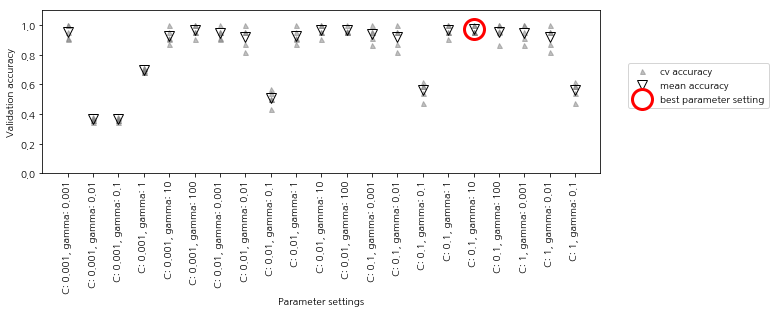

In [63]:
# 위의 함수에서 최적의 알고리즘을 찾는 과정을 시각화 한다
# 각 조합마다 5개씩의 값을 계산한다
mglearn.plots.plot_cross_val_selection()

In [64]:
# GridSearchCV : 매개변수 교차 검증기
# 매개변수 그리드(param_grid) : {dict} 형식으로 생성

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [65]:
# 교차검증을 시행하여 Valid 를 별로 구분하지 않아도 된다 
# 하지만 과적합방지를 위해 Test 데이터는 따로 구분이 필요하다
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# 분류기와 비슷한 .fit .predict .score 메서드를 제공한다
grid_search.fit(X_train, y_train)

print("테스트 데이터 점수 (.score)           : {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 교차 검증점수 (.best_score_)     : {:.2f}".format(grid_search.best_score_))
print("최적 매개변수     (.best_params_)    : {}".format(grid_search.best_params_))
print("최고 성능 모델    (.best_estimator_) : \n{}".format(grid_search.best_estimator_))

테스트 데이터 점수 (.score)           : 0.97
최적 교차 검증점수 (.best_score_)     : 0.97
최적 매개변수     (.best_params_)    : {'C': 100, 'gamma': 0.01}
최고 성능 모델    (.best_estimator_) : 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 04 교차검증 결과분석
.cv_results_ : 그리드 서치 분석결과를 테이블로 기록하여 DataFrame으로 변환하여 살펴보자

In [75]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

print(results.shape)
print(results.columns)
results.ix[:2, :9]
# result 테이블의 인덱스는 , 특정 매개변수 조합과 대응한다

(36, 22)
Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score
0,0.000864,0.000299,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375
1,0.000807,0.000295,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375
2,0.000814,0.000321,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375


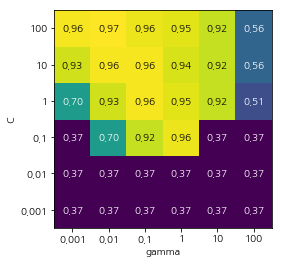

In [76]:
# 개별 조합 결과는 2차원 Table로 Heat Map으로 시각화에 용이하다
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차검증 평균(mean)점수 Heat-Map
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")